In [304]:
import torch
from torch import nn

torch.__version__


'2.6.0'

In [305]:
# setup device agonostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cpu'

### GET DATA

In [306]:
import requests
import zipfile
from pathlib import Path

# setup data path
data_path = Path("data")
image_path = data_path / "pizza_steak_sushi"
image_path

# if data already exist
if image_path.is_dir():
    print("Path already exist... skipping download")
else:
    image_path.mkdir(parents=True, exist_ok=True)
    with open(image_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading data")
        f.write(request.content)
        

# unizip the content
with zipfile.ZipFile(image_path/"pizza_steak_sushi.zip", "r") as f:
    print("Unzippimg the file")
    f.extractall(image_path)




Path already exist... skipping download
Unzippimg the file


In [307]:
import os
def walk_dir(path):
    """Walk in the path of dir"""
    for dirpath, dirnames, filenames in  os.walk(path):
        print(f"There are {len(dirnames)}directories and {len(filenames)} images in {dirpath}")
    

In [308]:
walk_dir(image_path)

There are 2directories and 1 images in data/pizza_steak_sushi
There are 3directories and 0 images in data/pizza_steak_sushi/test
There are 0directories and 19 images in data/pizza_steak_sushi/test/steak
There are 0directories and 31 images in data/pizza_steak_sushi/test/sushi
There are 0directories and 25 images in data/pizza_steak_sushi/test/pizza
There are 3directories and 0 images in data/pizza_steak_sushi/train
There are 0directories and 75 images in data/pizza_steak_sushi/train/steak
There are 0directories and 72 images in data/pizza_steak_sushi/train/sushi
There are 0directories and 78 images in data/pizza_steak_sushi/train/pizza


In [309]:
train_dir = image_path/"train"
test_dir = image_path/"test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [310]:
# Visualize image
import random
from PIL import Image

random.seed(42)

## Get all imgae path
image_path_list = list(image_path.glob("*/*/*.jpg"))

image_path_list
# pick a random image from list
random_image_path = random.choice(image_path_list)

random_image_path

PosixPath('data/pizza_steak_sushi/test/pizza/2236338.jpg')

In [311]:
# get the image class

image_class = random_image_path.parent.stem
image_class


'pizza'

Image path : data/pizza_steak_sushi/test/pizza/2236338.jpg
Image class : pizza
Image Height : 512 Width : 512


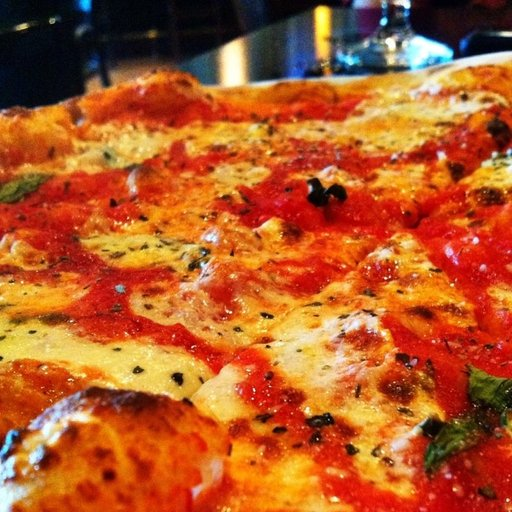

In [312]:
# open the imgae iwth PIL or pytorch - lets use PIL

img = Image.open(random_image_path)

print(f"Image path : {random_image_path}")
print(f"Image class : {image_class}")
print(f"Image Height : {img.height} Width : {img.width}")
img

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

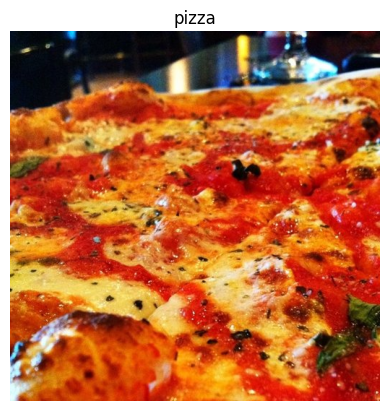

In [313]:
# visuali image iwth matplot lib
import matplotlib.pyplot as plt

plt.imshow(img)
plt.title(image_class)
plt.axis(False)

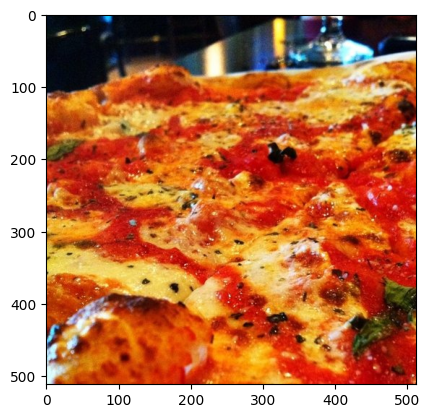

In [314]:
# show image is numpyarrya
import numpy as np

img_as_array = np.asarray(img)
plt.imshow(img_as_array)


In [315]:
# lets tranfroms the data into tensors
from torchvision import transforms

data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
    
])


data_transform(img).dtype,  data_transform(img).shape

(torch.float32, torch.Size([3, 64, 64]))

In [316]:
def plot_transformed_images(image_paths, transform, n=3, seed = None ):
    """Plot the transformed imgaes"""
    if seed: 
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original Size : {f.size}")
            ax[0].axis(False)
            
            # transformed image
            transformed_image = transform(f).permute(1,2,0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed Size : {transformed_image.shape}")
            ax[1].axis(False)
            
            fig.suptitle(f"{image_path.parent.stem}")

            
    
    

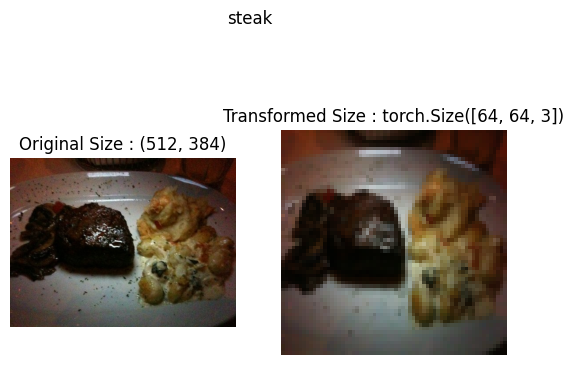

In [317]:
plot_transformed_images(image_path_list, transform=data_transform, n=1)

In [318]:
## Now lets turn our data into datasets
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir, 
                                  transform= data_transform,
                                  )

test_data = datasets.ImageFolder(root=test_dir,
                                 transform = data_transform)

In [319]:
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [320]:
train_data.classes

['pizza', 'steak', 'sushi']

In [321]:
train_data.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [322]:
train_data.samples[0]

class_names = train_data.classes




In [323]:
img, label = train_data[0]

print(f"Image shape : {img.shape}")
print(f"Image datyper : {img.dtype}")
print(f"Image label : {label} that is {class_names[label]}")

Image shape : torch.Size([3, 64, 64])
Image datyper : torch.float32
Image label : 0 that is pizza


In [324]:
print(f"Image datyper : {img.dtype}")
print(f"Image label : {label} that is {class_names[label]}")

Image datyper : torch.float32
Image label : 0 that is pizza


In [325]:
# shape of the tensor
img.shape

torch.Size([3, 64, 64])

In [326]:
# matplotlib expect color channel to be last
img_permute = img.permute(1,2,0)
img.shape, img_permute.shape


(torch.Size([3, 64, 64]), torch.Size([64, 64, 3]))

Text(0.5, 1.0, 'pizza')

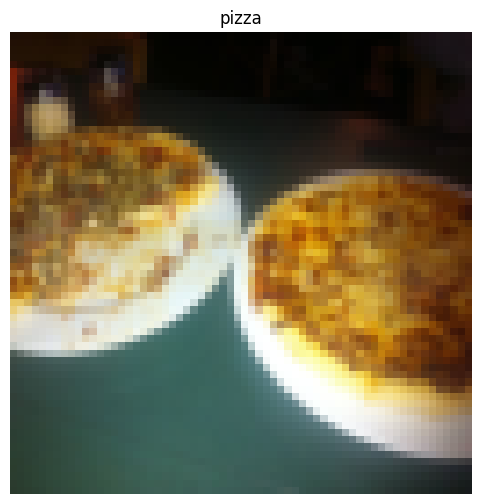

In [327]:
# since we permutre the shape, visulaze wit matplot lib
plt.figure(figsize=(10,6))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label])

In [328]:
# now lets convert oi]ur datadet into dataloader
from torch.utils.data import DataLoader

train_data_loader = DataLoader(dataset=train_data,
                               batch_size=32,
                               shuffle=True,
                               
                               )


tets_data_loader = DataLoader(dataset=test_data,
                              batch_size=32,
                            
                              )

In [329]:
len(next(iter(train_data_loader)))

2

In [330]:
len(train_data)

225

In [331]:
import os

os.cpu_count()

8

In [332]:
img, label =  next(iter(train_data_loader))

label.shape


torch.Size([32])

In [333]:
img.shape

torch.Size([32, 3, 64, 64])

In [334]:
## Option 5 :  Loading Image data with custom dataset
import torch
import os
import pathlib
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, List, Dict




class_name_found = [i.name for i in os.scandir(train_dir)]
print(class_name_found)


['steak', 'sushi', 'pizza']


In [335]:
def find_classes(dir:str) -> Tuple[List[str], Dict[str,int]]:
    """Find the class names in a directory"""
    classes = sorted(entry.name for entry in os.scandir(dir) if entry.is_dir())
    class_to_idx = {cls_name:i for i, cls_name in enumerate(classes)}
    return classes, class_to_idx



In [336]:
find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [337]:
### create a custom dataset, replacxement for ImageFolder
from torch.utils.data import Dataset

class ImageFolderCustom(Dataset):
    def __init__(self, target_dir: str, transform=None):
        self.paths = list(target_dir.glob("*/*.jpg"))
        self.tranform = transform
        self.classes, self.class_to_idx = find_classes(target_dir)
        
    def load_image(self, index:int)-> Image.Image:
        image_path = self.paths[index]
        return Image.open(image_path)
    

    def __len__(self)-> int:
        return len(self.paths)
    
    def __getitem__(self, index) ->  Tuple[torch.Tensor, int]:
        img = self.load_image(index)
        class_name = self.paths[index].parent.name
        class_idx = self.class_to_idx[class_name]
        
        if self.tranform:
            return self.tranform(img), class_idx
        else:
            return img, class_idx

In [338]:
pathlib.Path(test_dir)

PosixPath('data/pizza_steak_sushi/test')

In [339]:
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
       
])

test_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

train_data_custom = ImageFolderCustom(target_dir=train_dir, transform=train_transform)
test_data_custom = ImageFolderCustom(target_dir=test_dir, transform=test_transform)
len(train_data_custom), len(test_data_custom)

(225, 75)

In [340]:
# let's visulaize the custom data


type(train_data)

torchvision.datasets.folder.ImageFolder

In [341]:
# visulaize images

def display_radom_images(dataset: torch.utils.data.Dataset,
                         classes: List[str] = None,
                         n:int = 10,
                         display_shape: bool = True,
                         seed:int = None):
    if n > 10 : 
        n = 10
        display_shape = False
        print("FOr diaplay purpose n cant be grater than 10")
    
    if seed:
        random.seed(seed)
        
    random_sample_idx = random.sample(range(len(dataset)), k=n)
    
    plt.figure(figsize=(16,8))
    
    
    for i, target_sampel in enumerate(random_sample_idx):
        trag_image, trag_label = dataset[target_sampel][0], dataset[target_sampel][1]
        trag_image_adjust = trag_image.permute(1,2,0)
        
        plt.subplot(1,n,i+1)
        plt.imshow(trag_image_adjust)
        plt.axis(False)
        
        if classes:
            title = f"Class : {classes[trag_label]}"
            if display_shape:
                title = title + f"\nShape: {trag_image.shape}"
        
        plt.title(title)
        
        
        
    

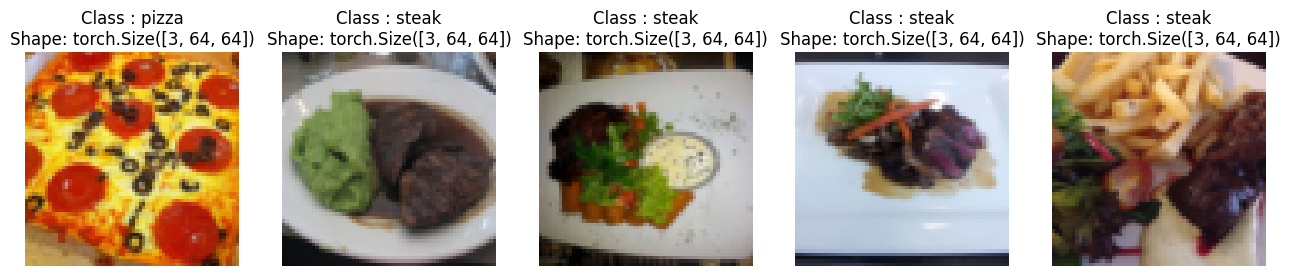

In [342]:
display_radom_images(dataset=train_data_custom,
                     classes=class_names,
                     n=5,
                     seed=None)

In [343]:
# setup the dataloader
from torch.utils.data import DataLoader

train_data_loader_custom = DataLoader(dataset=train_data_custom,
                                           batch_size=32,
                                           num_workers=0,
                                           shuffle=True)

test_data_loader_custom = DataLoader(dataset=test_data_custom,
                                     batch_size=32,
                                     num_workers=0,
                                     shuffle=False)

In [344]:
# get the firts batch

img_custom, img_label = next(iter(train_data_loader_custom))

img_custom.shape, img_label.shape


(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [345]:
## Data Augmentation :  other form of transformation
from torchvision import transforms
train_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
    
])


test_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
    
])


In [346]:
image_list_path = list(image_path.glob("*/*/*.jpg"))

image_list_path[:10]

[PosixPath('data/pizza_steak_sushi/test/steak/296375.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/673127.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/894825.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1868005.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/27415.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1016217.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1285886.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/502076.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/3424937.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/690177.jpg')]

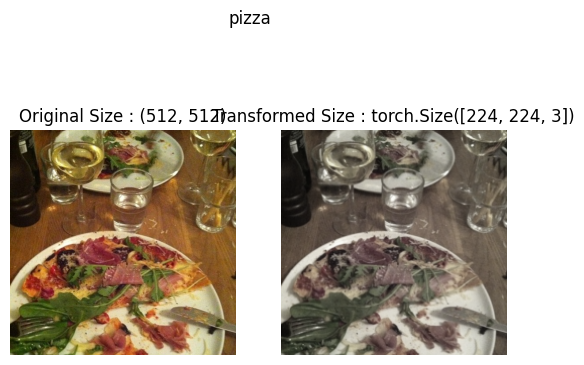

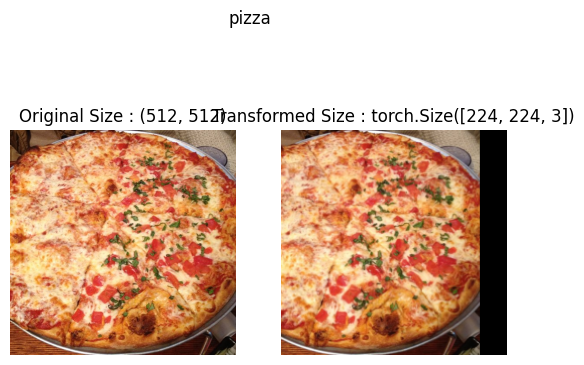

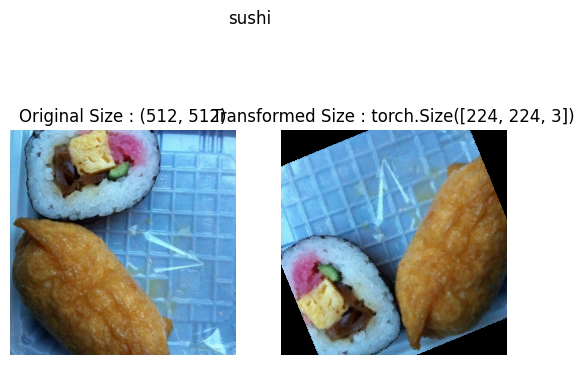

In [347]:
plot_transformed_images(image_paths=image_list_path,
                        transform=train_transform,
                        n=3,
                        seed=None)

In [348]:
# model 0 : Tiny VGG withou data augmentation
# Baseline model
from torchvision import transforms, datasets

simple_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

# load data


train_data = datasets.ImageFolder(root=train_dir,
                                  transform=simple_transform)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=simple_transform)

# batch th e data
from torch.utils.data import DataLoader

train_data_loader = DataLoader(dataset=train_data,
                               batch_size=32,
                               shuffle=True)

test_data_loader = DataLoader(dataset=test_data,
                              batch_size=32,
                              shuffle=False)




In [349]:
# Build the model
from torch import nn

class TinyVGG(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
         
        self.conv_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1,padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
            
        )
        
        self.conv_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1,padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
            
        )
        
        self.classifer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units *13*13, 
                      out_features=output_shape)
            
        )
    
    def forward(self, x):
        x = self.conv_1(x)
        # print(f"After 1st conv : {x.shape}")
        x = self.conv_2(x)
        # print(f"After 2nd conv : {x.shape}")
        x = self.classifer(x)
        # print(f"After Classifier : {x.shape}")
        return x

In [350]:
torch.manual_seed(42)

model_0 = TinyVGG(input_shape=3, hidden_units=10, output_shape=len(class_names)).to(device)

In [351]:
model_0

TinyVGG(
  (conv_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [352]:
img_batch, img_label = (next(iter(train_data_loader)))

img_batch.shape

torch.Size([32, 3, 64, 64])

In [353]:
model_0(img_batch).shape

torch.Size([32, 3])

In [354]:
from torchinfo import summary

summary(model_0, input_size=(1,3,64,64))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

In [355]:
# create the train setup
from torchmetrics import Accuracy
accuracy = Accuracy(task="multiclass", num_classes=len(train_data.classes))


def train_step(model:nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn : nn.Module,
               optimizer:torch.optim.Optimizer,
               device = device):
    
    # 1. put the model in train model
    model.train()
    # set metric
    train_loss, train_acc = 0, 0
    
    #loop on dataloader
    for batch, (X,y) in enumerate(data_loader):
        #send the data to target device
        X , y = X.to(device),  y.to(device)
        # forward pass
        train_logits = model_0(X)
        # calc the loss
        loss = loss_fn(train_logits, y)
        train_loss += loss
        # optimizer zero grad
        optimizer.zero_grad()
        #back pass
        loss.backward()
        # adjust the optimizer
        optimizer.step()
        
        # calc accuracy
        
        y_pred_class = torch.argmax(torch.softmax(train_logits, dim=1), dim=1)
        train_acc += accuracy(y_pred_class, y)
    
    
    train_acc = train_acc / len(data_loader)
    train_loss = train_loss / len(data_loader)
    
    return train_loss, train_acc
        
    

In [356]:
def test_step(model:nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn : nn.Module,
              device = device):
    
    model.eval()
    # since its a dataloader, set test_loss and acc
    test_loss, test_acc = 0, 0
    
    # turn thr infereance mode
    with torch.inference_mode():
    
        for X,y in data_loader:
            
            # send data to target device
            X, y = X.to(device), y.to(device)
            
            #forward pass
            y_preds = model(X)
            
            loss = loss_fn(y_preds, y)
            
            test_loss += loss
            
            y_pred_label = torch.argmax(y_preds , dim=1)
            
            test_acc += accuracy(y_pred_label, y)
            
    test_loss = test_loss /len(data_loader)
    test_acc = test_acc / len(data_loader)
    
    return test_loss, test_acc
         
    
    
    
    
    

In [357]:
# combine to train and test step
from tqdm.auto import tqdm

def train(model:nn.Module,
          train_data_loader : torch.utils.data.DataLoader,
          test_data_loader : torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer, 
          EPOCHS = 3 , 
          loss_fn : nn.Module = nn.CrossEntropyLoss(),
          device = device):
    
    
    
    results = { "train_loss" : [], "test_loss" : [],  "train_acc" : [], "test_acc" : [] }

    for epcoh in tqdm(range(EPOCHS)):
        
        train_loss, train_acc  = train_step(model, train_data_loader, loss_fn, optimizer, device)
        test_loss,  test_acc = test_step(model, test_data_loader, loss_fn, device)
        
        print(f"Epoch  : {epcoh} | Train loss : {train_loss} | Train acc : {train_acc} | Test loss : {test_loss}| Test acc : {test_acc}")
        
        results["test_acc"].append(test_acc.item())
        results["train_acc"].append(train_acc.item())
        results["test_loss"].append(test_loss.item())
        results["train_loss"].append(train_loss.item())
        
    
    return results



        

        
    
    

In [358]:
# Train and evaluate the model
import torch
torch.manual_seed(42)
torch.cuda.manual_seed(42)


EPOCHS = 5

# instanitae tinyvff

model_0  = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)
                  )


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.001)


# start tyhe timert

from timeit import default_timer as timer 

start =timer()

model_0_result = train(model=model_0,train_data_loader=train_data_loader, test_data_loader=test_data_loader, optimizer=optimizer, loss_fn=loss_fn, EPOCHS=EPOCHS)

end = timer()

print(f"Total time took : {end-start} seconds")



 20%|██        | 1/5 [00:00<00:02,  1.39it/s]

Epoch  : 0 | Train loss : 1.1063189506530762 | Train acc : 0.3046875 | Test loss : 1.0983216762542725| Test acc : 0.3011363744735718


 40%|████      | 2/5 [00:01<00:02,  1.48it/s]

Epoch  : 1 | Train loss : 1.099778413772583 | Train acc : 0.328125 | Test loss : 1.069703459739685| Test acc : 0.5416666865348816


 60%|██████    | 3/5 [00:01<00:01,  1.52it/s]

Epoch  : 2 | Train loss : 1.086864709854126 | Train acc : 0.48828125 | Test loss : 1.080764651298523| Test acc : 0.49242424964904785


 80%|████████  | 4/5 [00:02<00:00,  1.54it/s]

Epoch  : 3 | Train loss : 1.0843056440353394 | Train acc : 0.3984375 | Test loss : 1.060743808746338| Test acc : 0.5833333134651184


100%|██████████| 5/5 [00:03<00:00,  1.53it/s]

Epoch  : 4 | Train loss : 1.066161036491394 | Train acc : 0.4140625 | Test loss : 1.0653504133224487| Test acc : 0.564393937587738
Total time took : 3.2658932499998627 seconds


In [359]:
model_0_result

{'train_loss': [1.1063189506530762,
  1.099778413772583,
  1.086864709854126,
  1.0843056440353394,
  1.066161036491394],
 'test_loss': [1.0983216762542725,
  1.069703459739685,
  1.080764651298523,
  1.060743808746338,
  1.0653504133224487],
 'train_acc': [0.3046875, 0.328125, 0.48828125, 0.3984375, 0.4140625],
 'test_acc': [0.3011363744735718,
  0.5416666865348816,
  0.49242424964904785,
  0.5833333134651184,
  0.564393937587738]}

In [369]:
# Plot the loss curve
def plot_loass_curve(results: Dict[str, List[float]]):
    """Plot the loss and accuracy curve"""
    
    loss = results["train_loss"]
    test_loss = results["test_loss"]
    
    # accurcy
    acc = results["train_acc"]
    test_acc = results["test_acc"]
    
    
    epochs =  range(len(results["test_acc"]))
    
    plt.figure(figsize=(12,8))
    
    plt.subplot(1,2,1)
    plt.plot(epochs, loss, label="train loss")
    plt.plot(epochs, test_loss, label="test loss")
    plt.title("Loss")
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(epochs, acc, label="train acc")
    plt.plot(epochs, test_acc, label = "test scc" )
    plt.title("Accuracy")

    plt.legend()
    
    
    

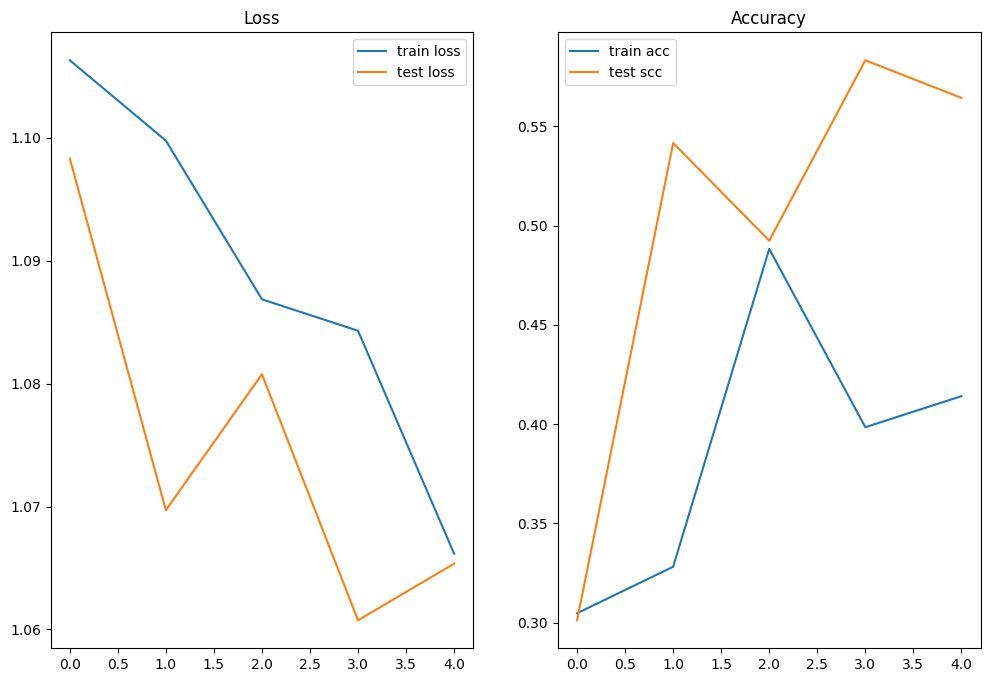

In [370]:
plot_loass_curve(model_0_result)